<a href="https://colab.research.google.com/github/byeolbyeolbyeol/Dog_Cat_Flower/blob/main/Dog_Cat_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
import tensorflow_datasets as tfds

tfds.__version__

'4.9.9'

# 데이터셋 다운로드

아래에서 download 부분을 True로 바꿔줘야 데이터 다운로드가 가능합니다

기존의 세팅은 로컬 경로에 이미 데이터가 있는 경우에요!

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    # 여기 경로 바꿔주시고
    data_dir='./content',
    # 여기 True로 변경
    download=True,
    with_info=True,
    as_supervised=True,
)

In [24]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

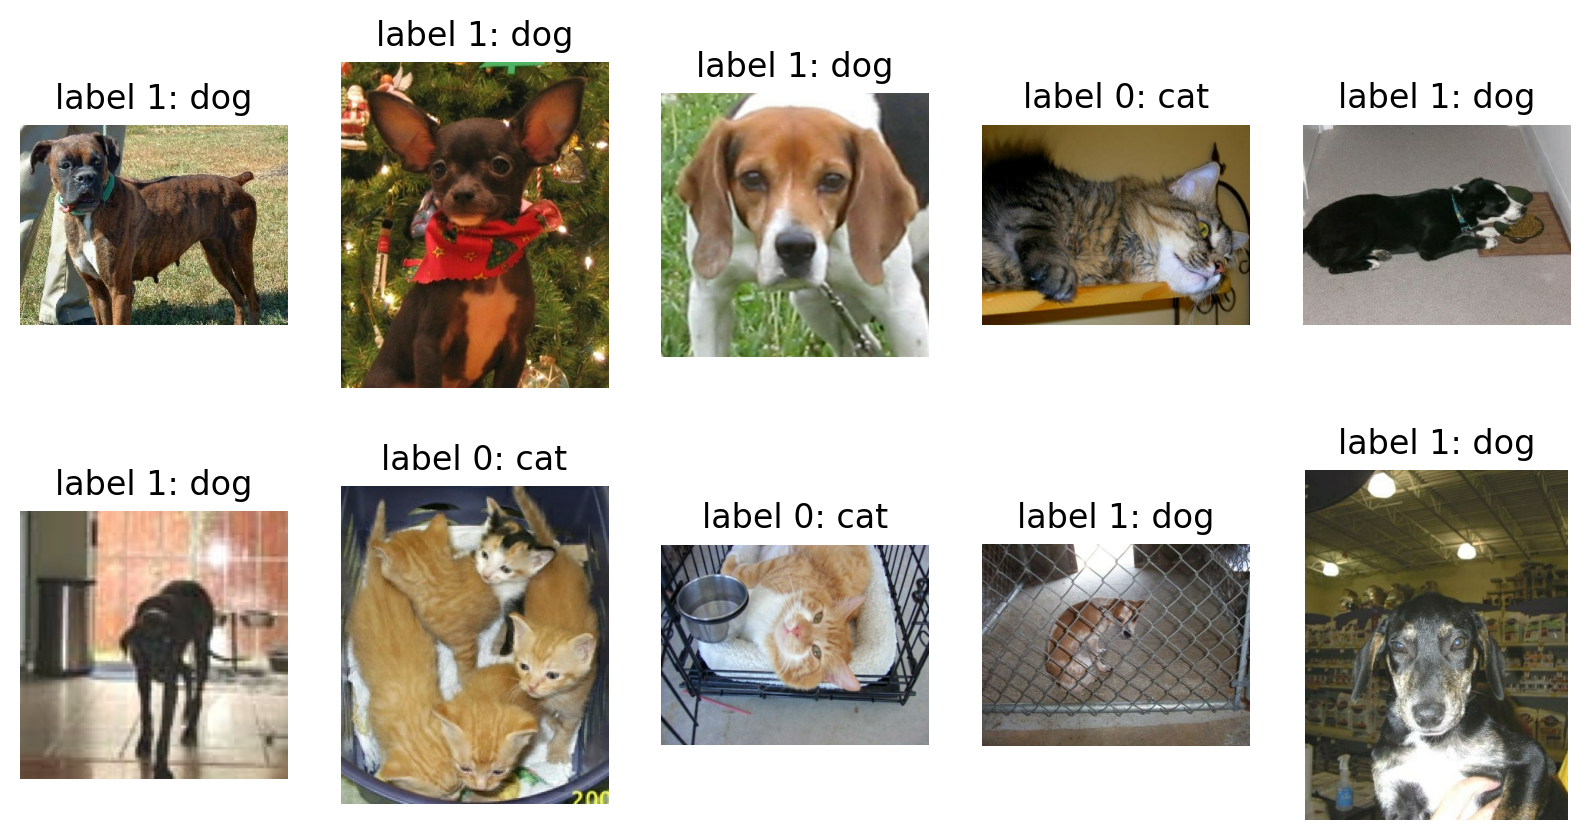

In [7]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [8]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [9]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


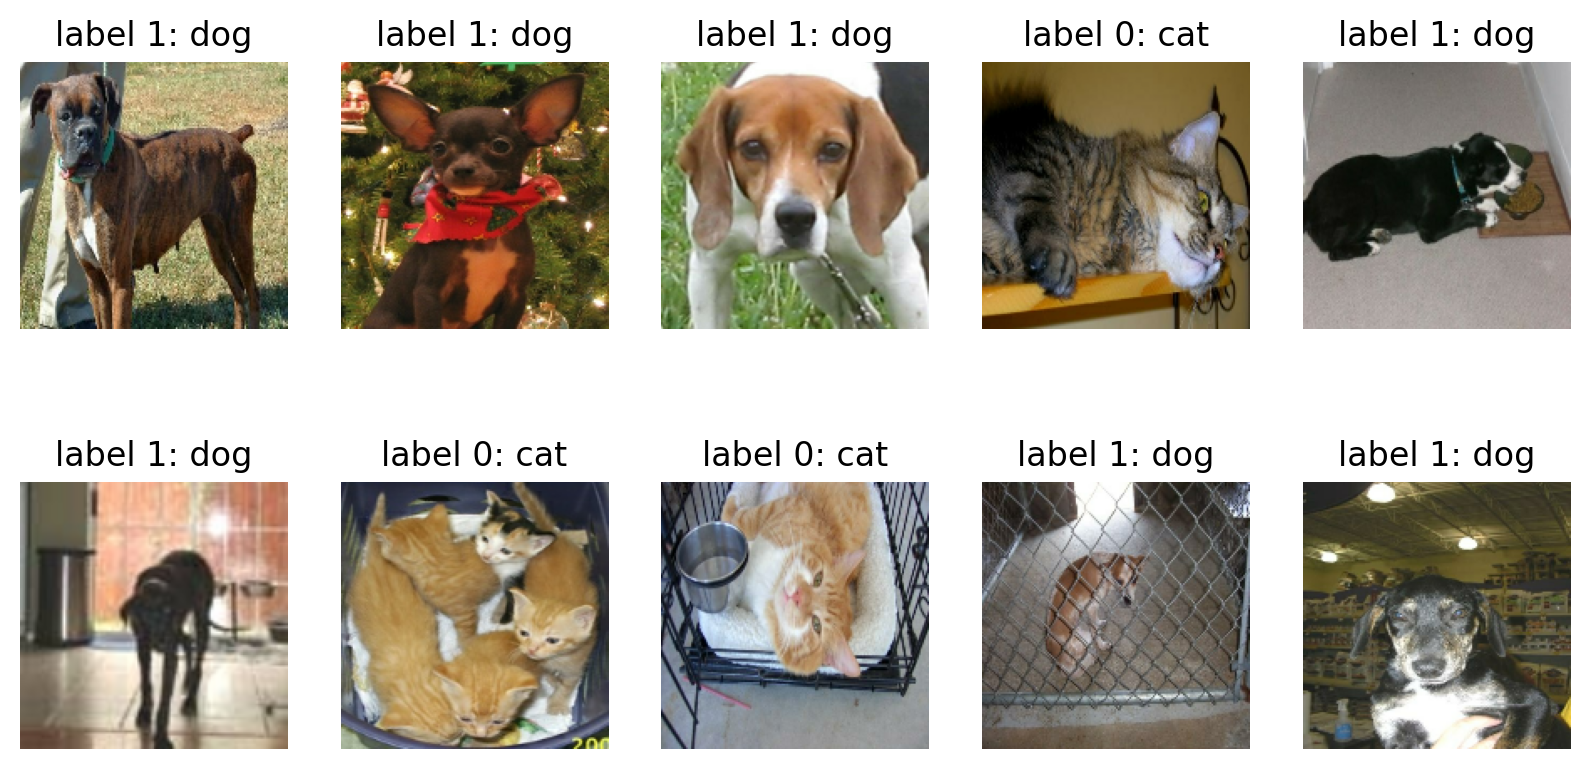

In [10]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [12]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [14]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000


In [15]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [16]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

In [17]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5250 - loss: 0.6899
initial loss: 0.69
initial accuracy: 0.53


In [18]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.6155 - loss: 0.6663 - val_accuracy: 0.7236 - val_loss: 0.5518
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.7390 - loss: 0.5256 - val_accuracy: 0.7132 - val_loss: 0.5622
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.7796 - loss: 0.4679 - val_accuracy: 0.7210 - val_loss: 0.5728
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.8085 - loss: 0.4170 - val_accuracy: 0.7756 - val_loss: 0.4911
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.8328 - loss: 0.3771 - val_accuracy: 0.7803 - val_loss: 0.4748
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.8577 - loss: 0.3311 - val_accuracy: 0.7863 - val_loss: 0.4868
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.8793 - loss: 0.2857 - val_accuracy: 0.7837 - val_loss: 0.4980
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9042 - loss: 0.2367 - 

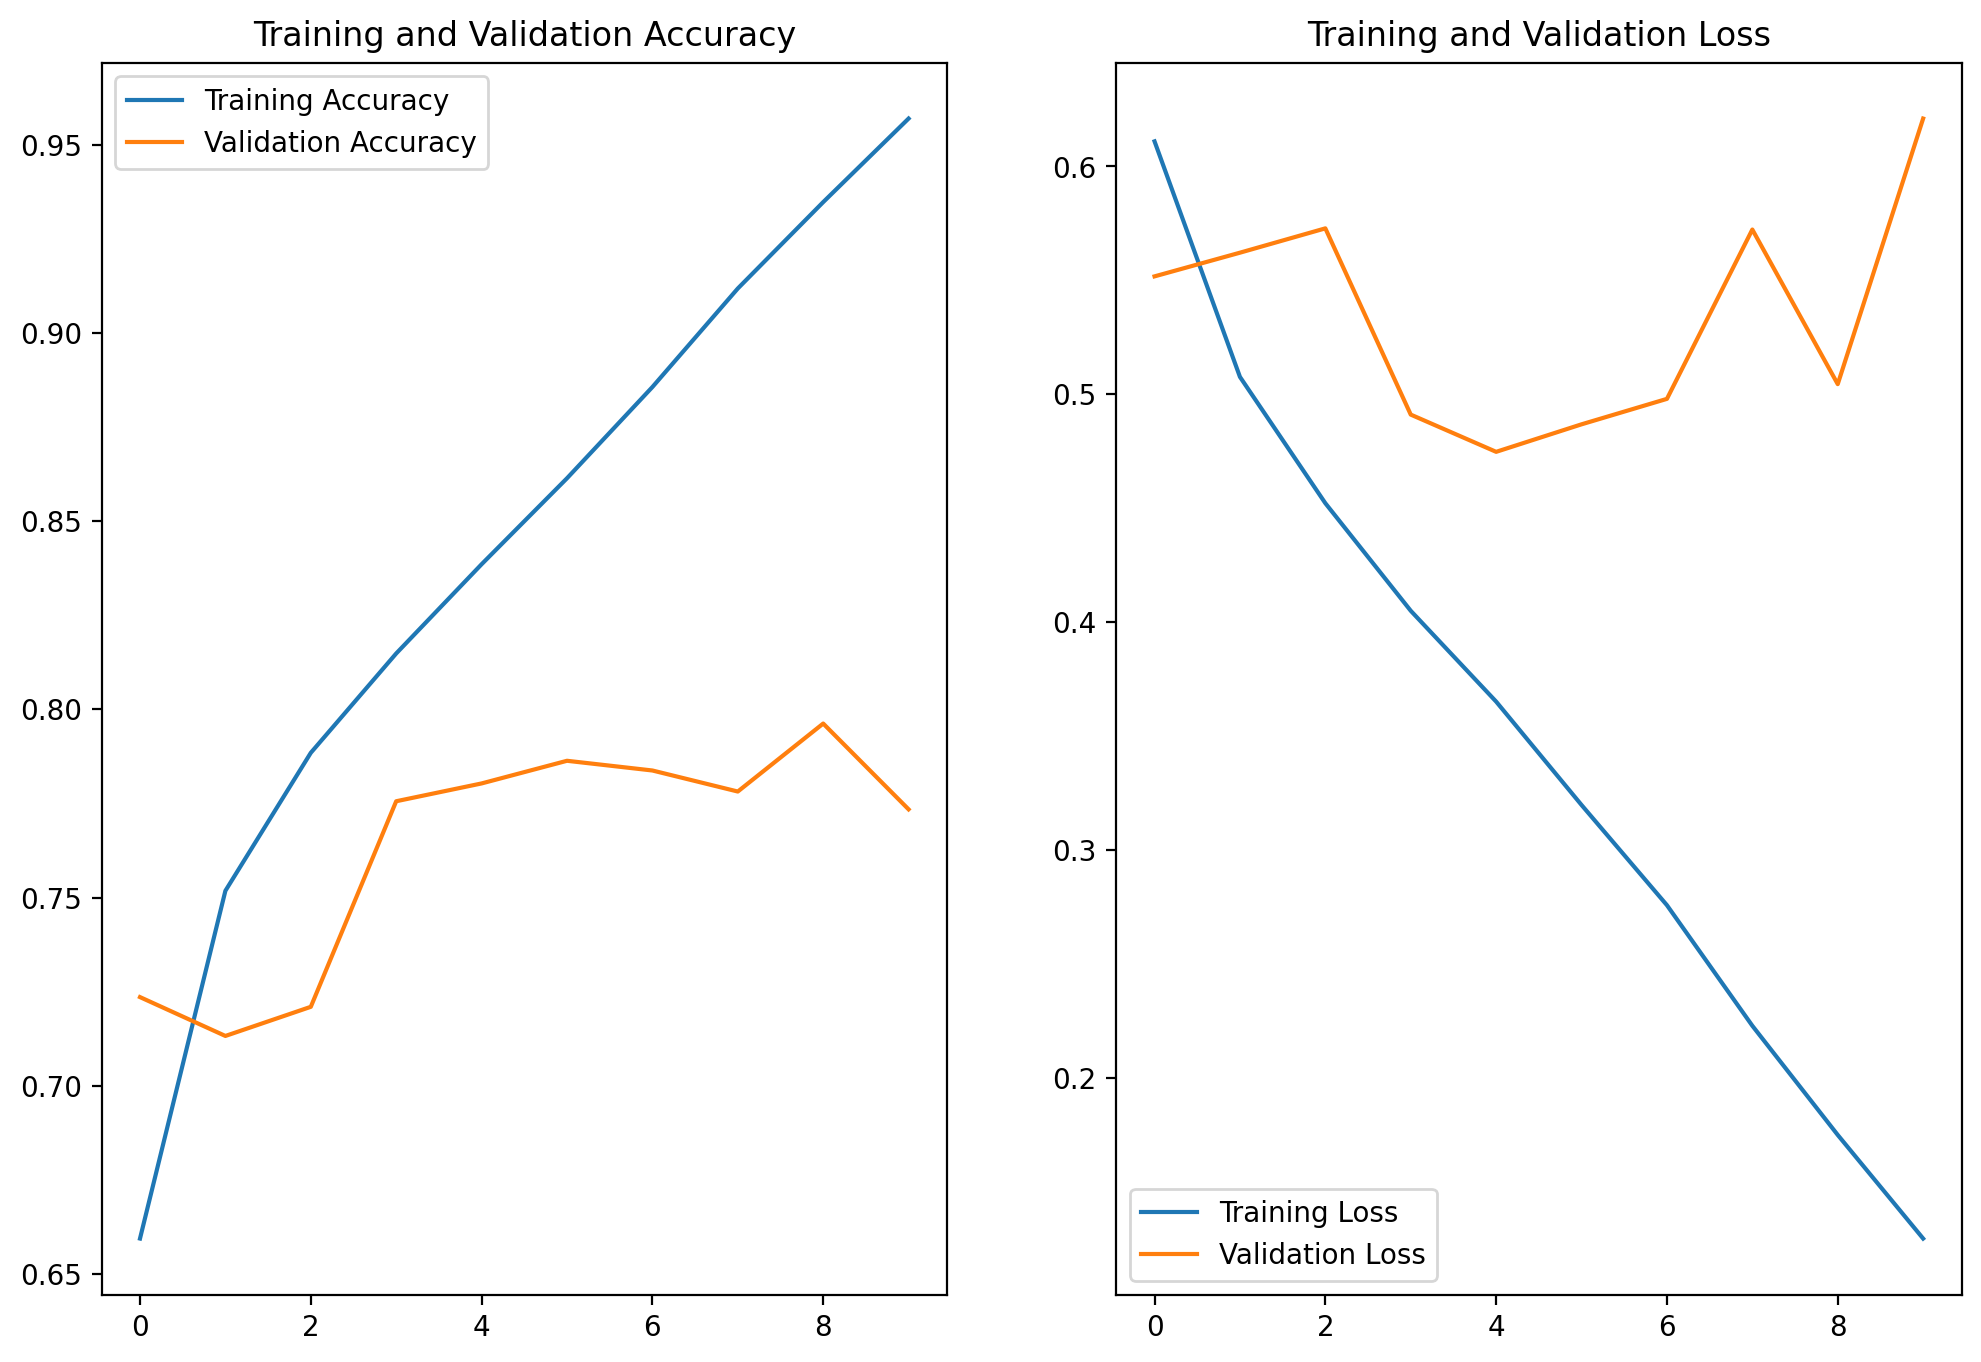

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [20]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


array([[9.9968487e-01, 3.1503808e-04],
       [9.9527937e-01, 4.7205910e-03],
       [2.6623881e-01, 7.3376125e-01],
       [9.9998212e-01, 1.7854602e-05],
       [4.7743449e-01, 5.2256548e-01],
       [3.8980216e-01, 6.1019784e-01],
       [1.1645807e-01, 8.8354182e-01],
       [9.9344313e-01, 6.5569151e-03],
       [2.0270100e-01, 7.9729903e-01],
       [5.2916604e-01, 4.7083390e-01],
       [4.4183022e-01, 5.5816978e-01],
       [9.9985075e-01, 1.4926343e-04],
       [9.9756527e-01, 2.4348062e-03],
       [2.3441077e-03, 9.9765587e-01],
       [9.9905568e-01, 9.4429194e-04],
       [9.9892539e-01, 1.0745749e-03],
       [9.9828285e-01, 1.7171033e-03],
       [9.0874648e-01, 9.1253549e-02],
       [9.6684587e-01, 3.3154164e-02],
       [5.7384312e-02, 9.4261575e-01],
       [9.9955410e-01, 4.4584993e-04],
       [9.9976057e-01, 2.3939747e-04],
       [9.9837852e-01, 1.6214565e-03],
       [6.7474139e-01, 3.2525867e-01],
       [9.1202116e-01, 8.7978929e-02],
       [8.0374098e-01, 1.

In [21]:
import numpy as np

predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

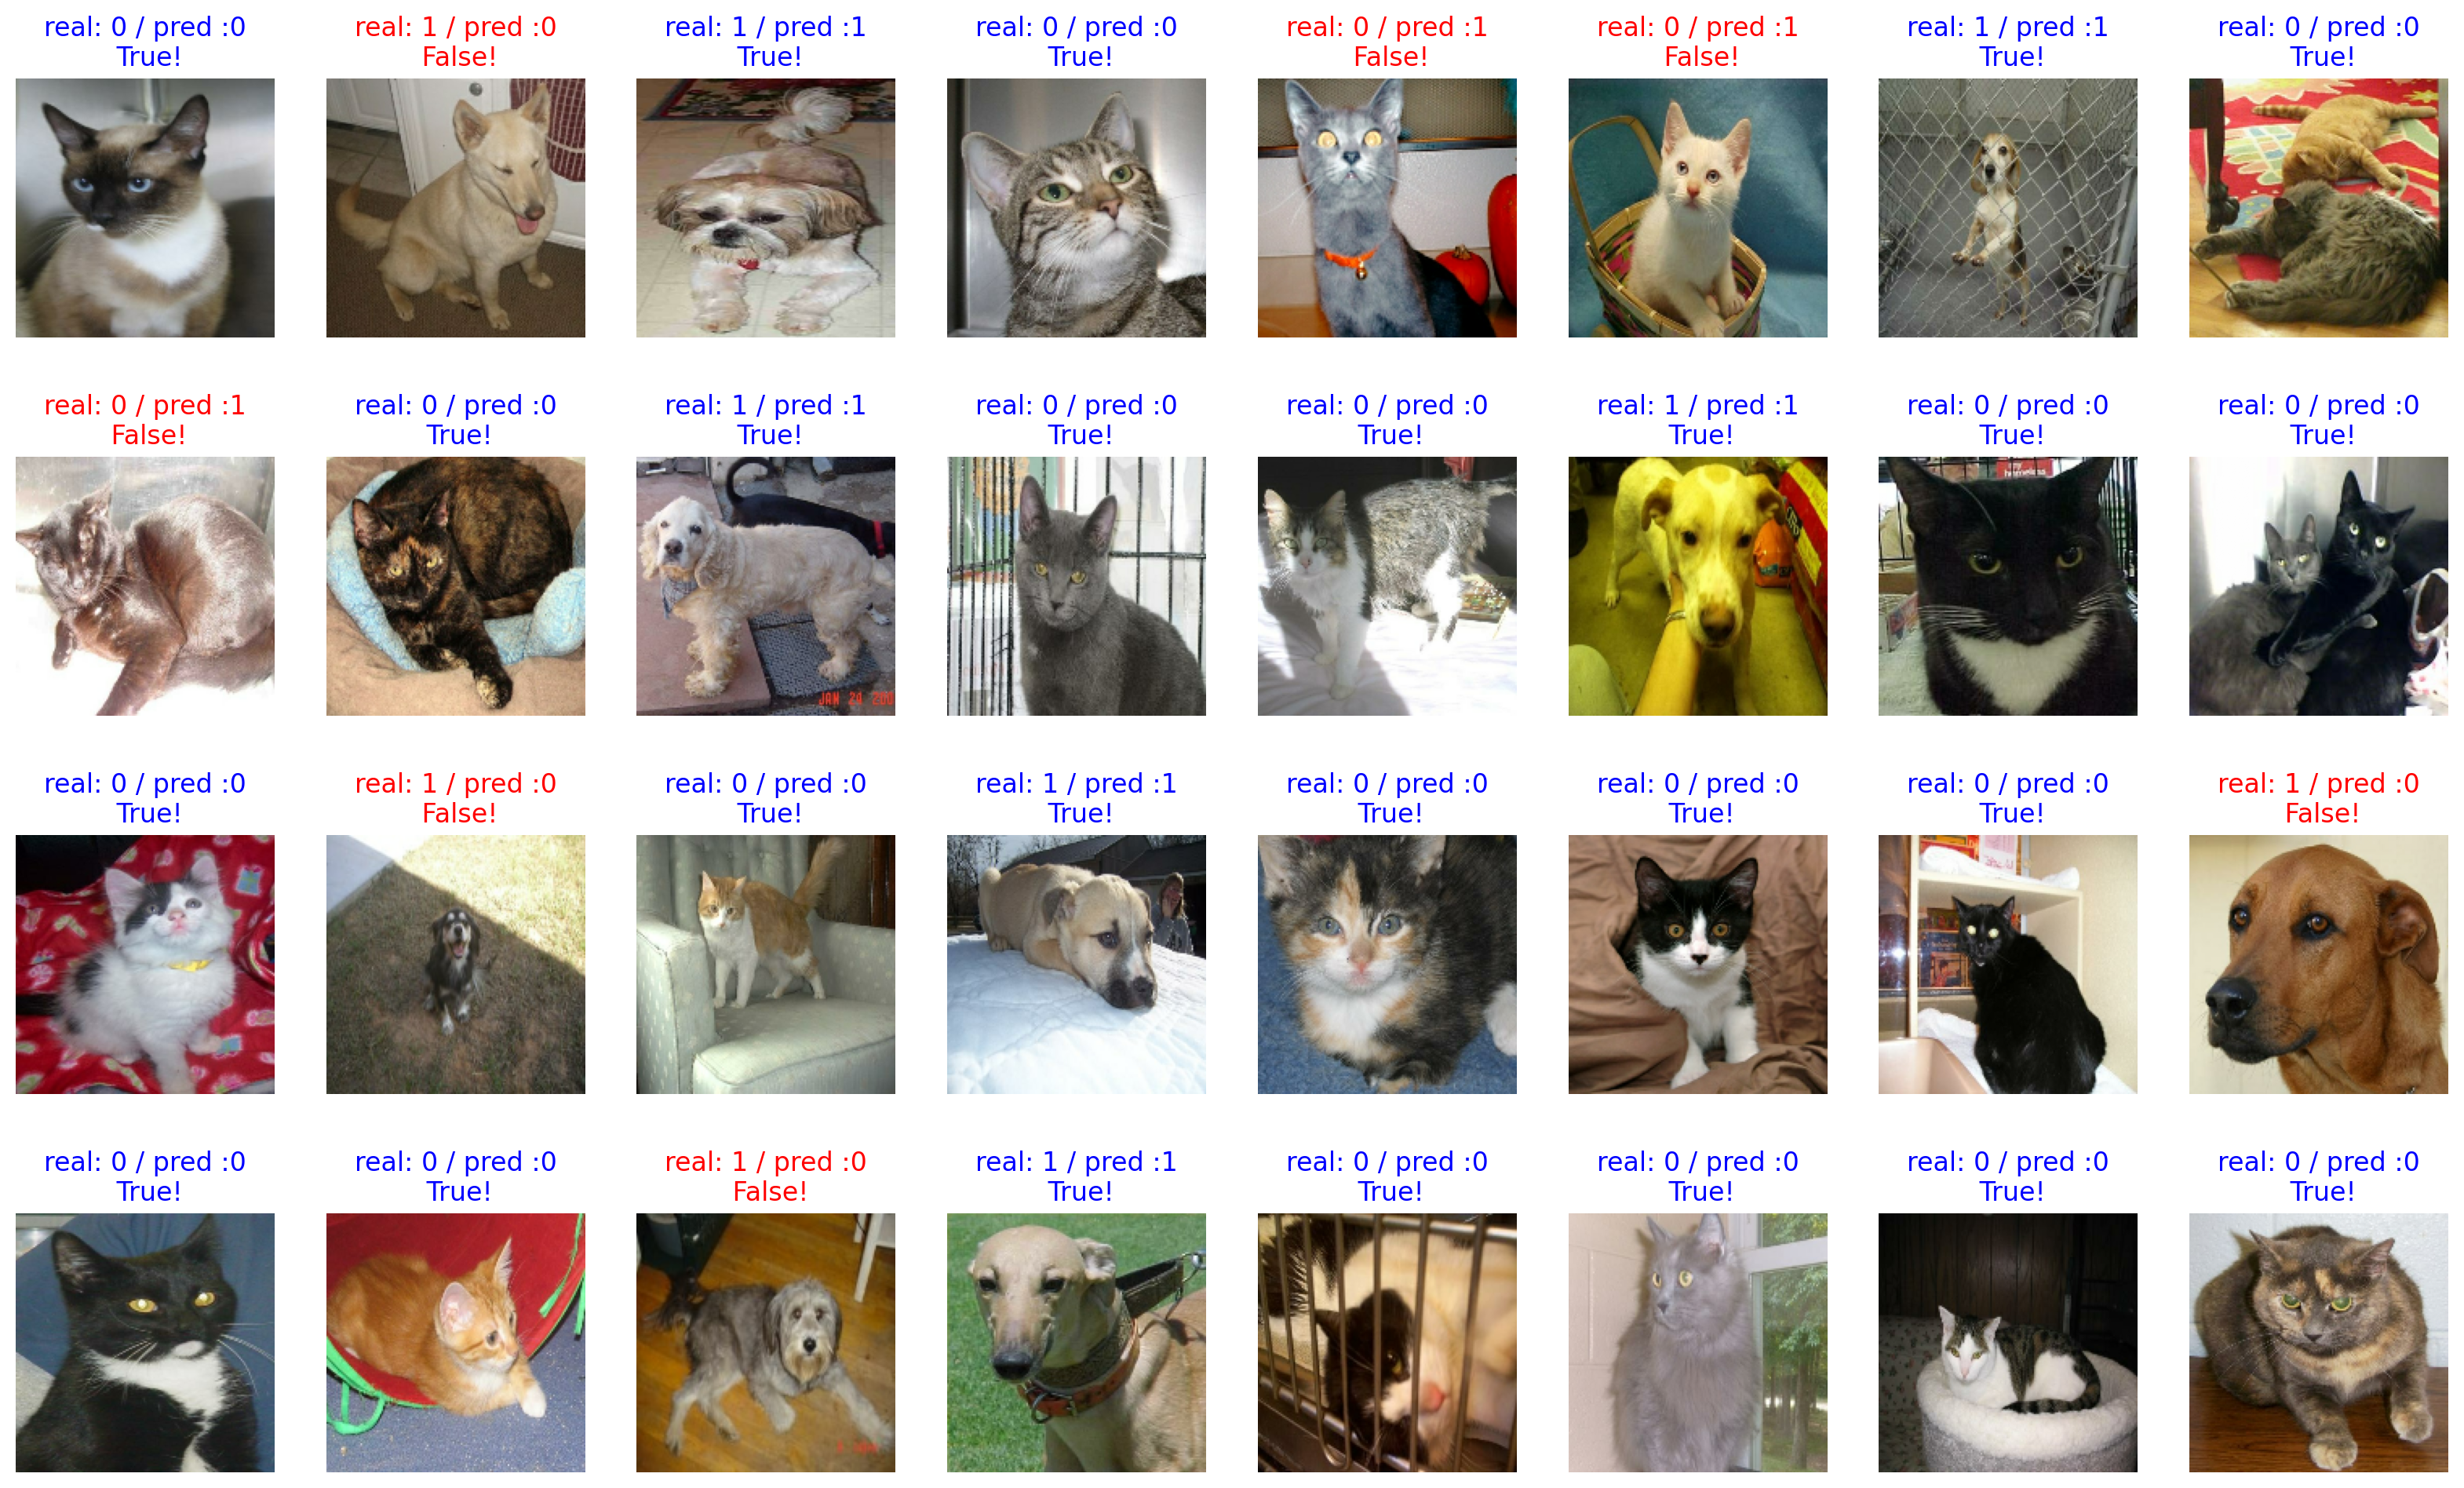

In [22]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [23]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100)

78.125
